In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)

In [4]:
#Import Data
generation_data = pd.read_csv('Data/Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('Data/Plant_1_Weather_Sensor_Data.csv')

In [5]:
generation_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6.260e+06
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6.184e+06
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6.988e+06
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7.603e+06
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7.159e+06


In [6]:
weather_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184,22.858,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.085,22.762,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.936,22.592,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846,22.361,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.622,22.165,0.0


In [7]:
#Adjust Date Time Format
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format='%d-%m-%Y %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')


In [8]:
generation_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6.260e+06
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6.184e+06
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6.988e+06
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7.603e+06
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7.159e+06


In [9]:
weather_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184,22.858,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.085,22.762,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.936,22.592,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846,22.361,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.622,22.165,0.0


In [10]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']), 
                    weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')

In [11]:
df_solar.head()

,DATE_TIME,DC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15,0.0,25.184,22.858,0.0
1,2020-05-15,0.0,25.184,22.858,0.0
2,2020-05-15,0.0,25.184,22.858,0.0
3,2020-05-15,0.0,25.184,22.858,0.0
4,2020-05-15,0.0,25.184,22.858,0.0


In [12]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68774 entries, 0 to 68773
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            68774 non-null  datetime64[ns]
 1   DC_POWER             68774 non-null  float64       
 2   AMBIENT_TEMPERATURE  68774 non-null  float64       
 3   MODULE_TEMPERATURE   68774 non-null  float64       
 4   IRRADIATION          68774 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 2.6 MB


In [13]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month


# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head()

,DATE_TIME,DC_POWER,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,0.0,25.184,22.858,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15
1,2020-05-15,0.0,25.184,22.858,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15
2,2020-05-15,0.0,25.184,22.858,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15
3,2020-05-15,0.0,25.184,22.858,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15
4,2020-05-15,0.0,25.184,22.858,0.0,2020-05-15,00:00:00,15,5,0,0,0,2020-05-15


In [14]:
df_solar.isnull().sum()

DATE_TIME              0
DC_POWER               0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

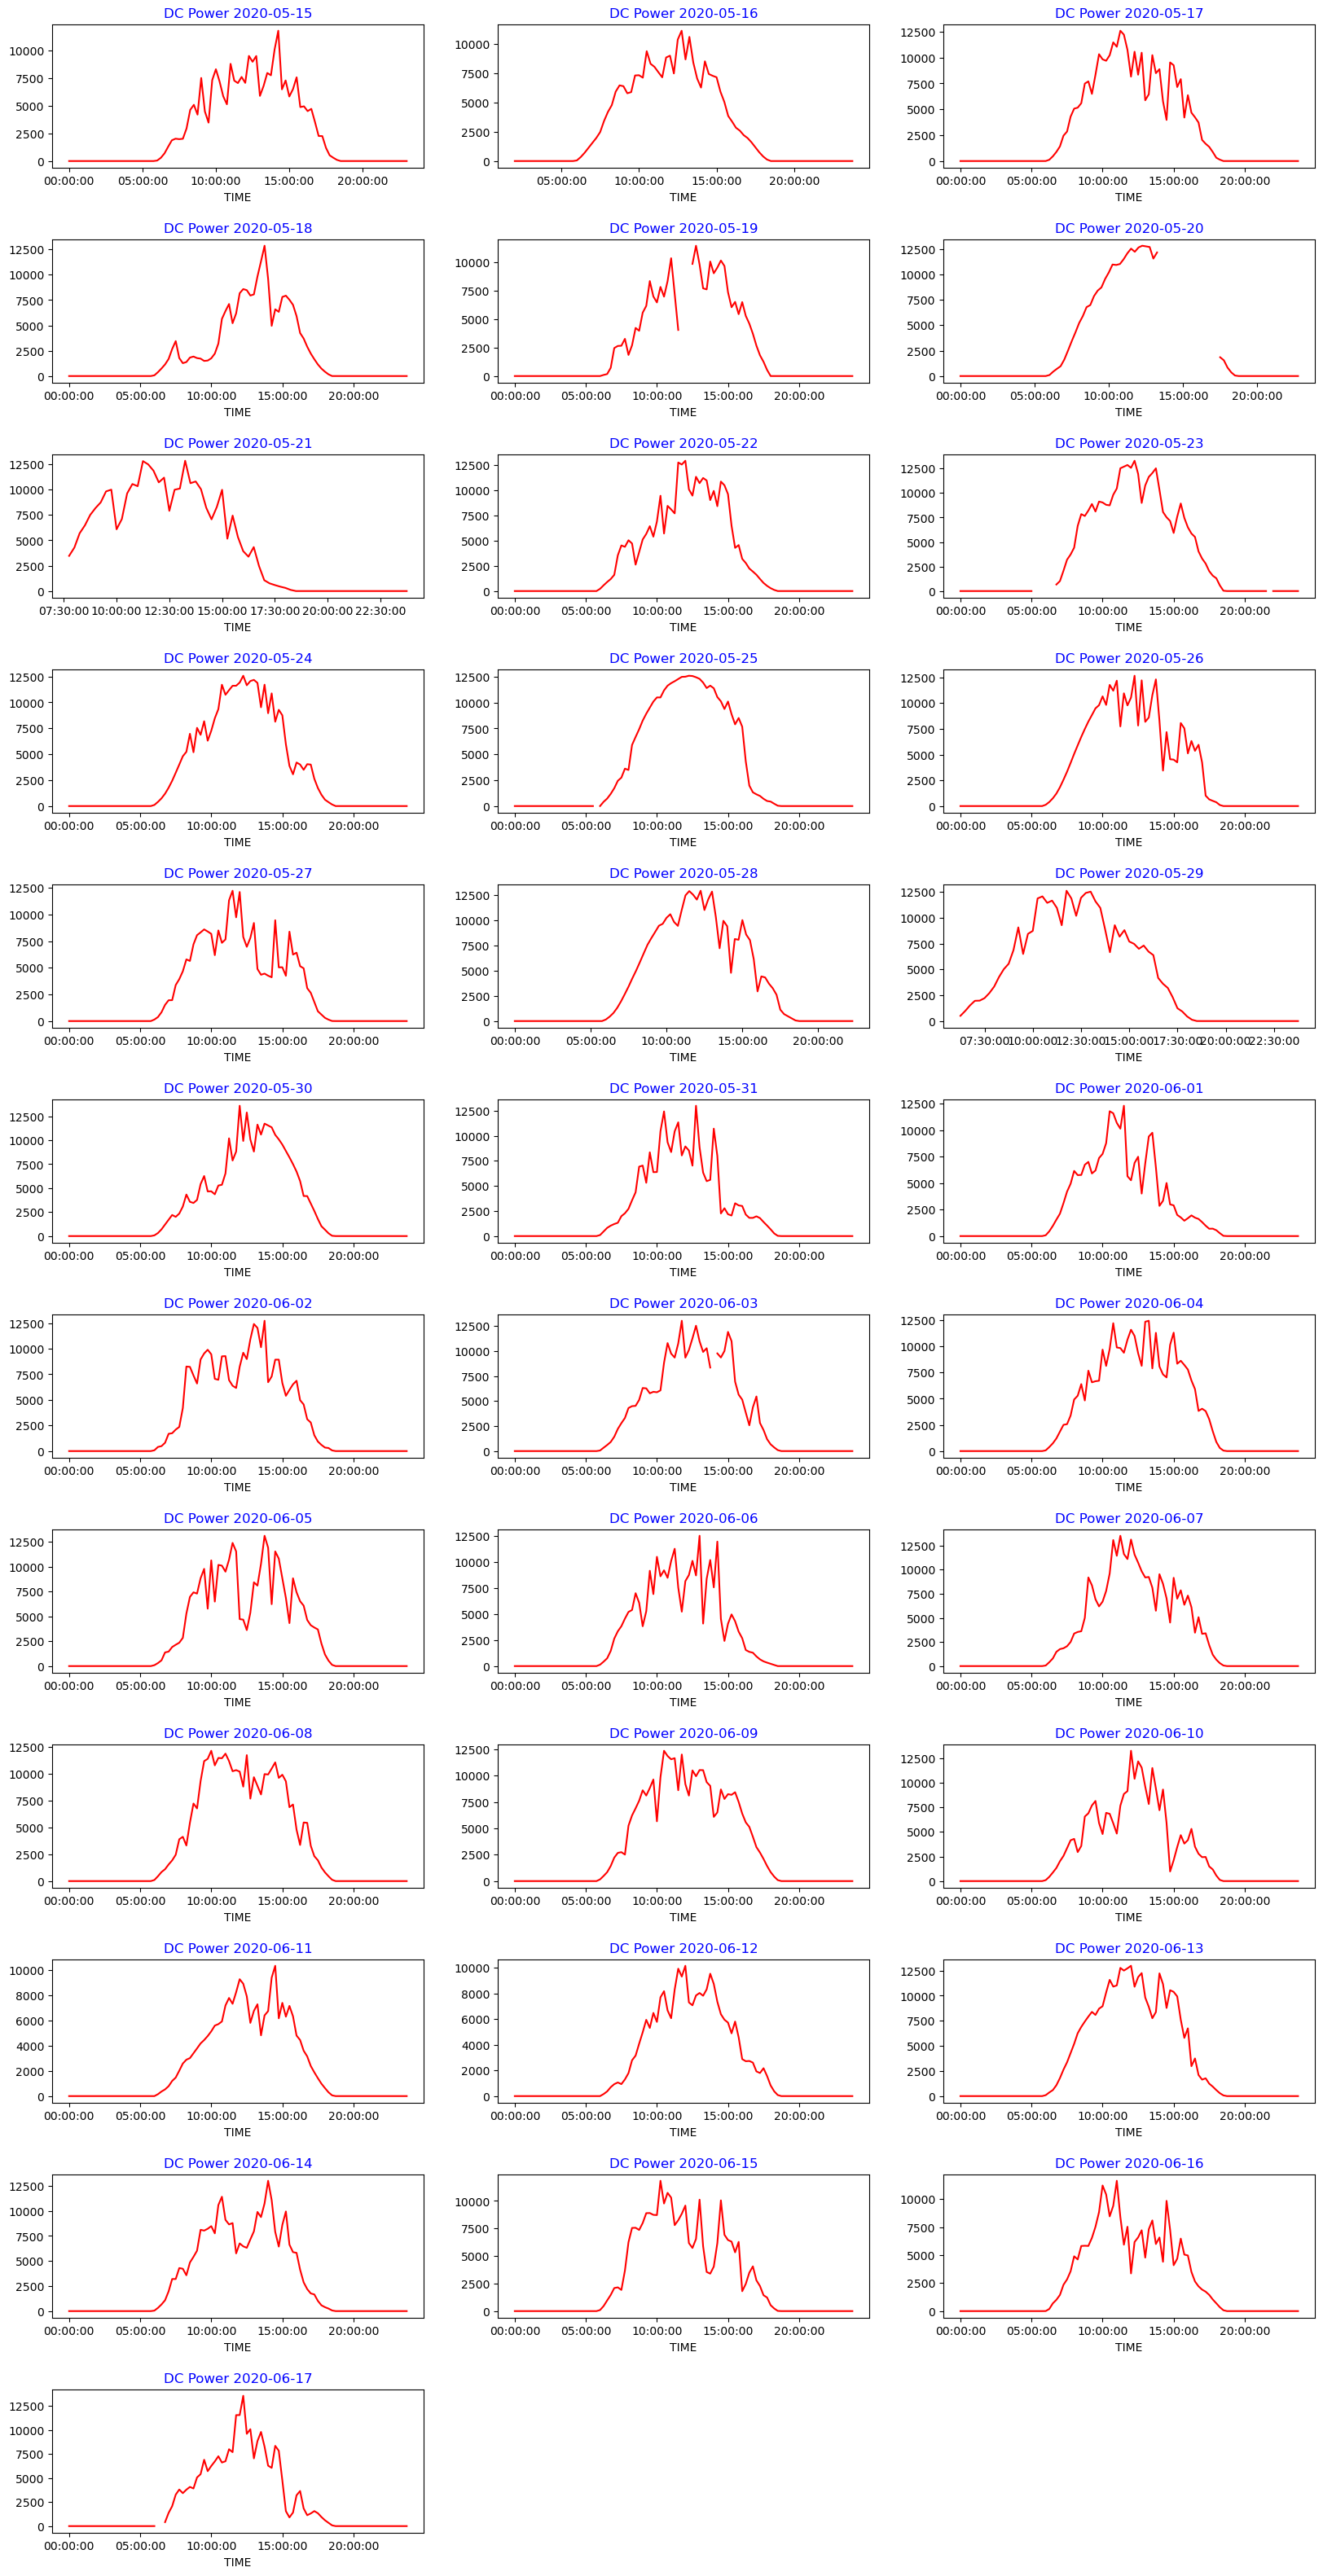

In [15]:
pv_power = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=pv_power, row=12, col=3)
plt.show()

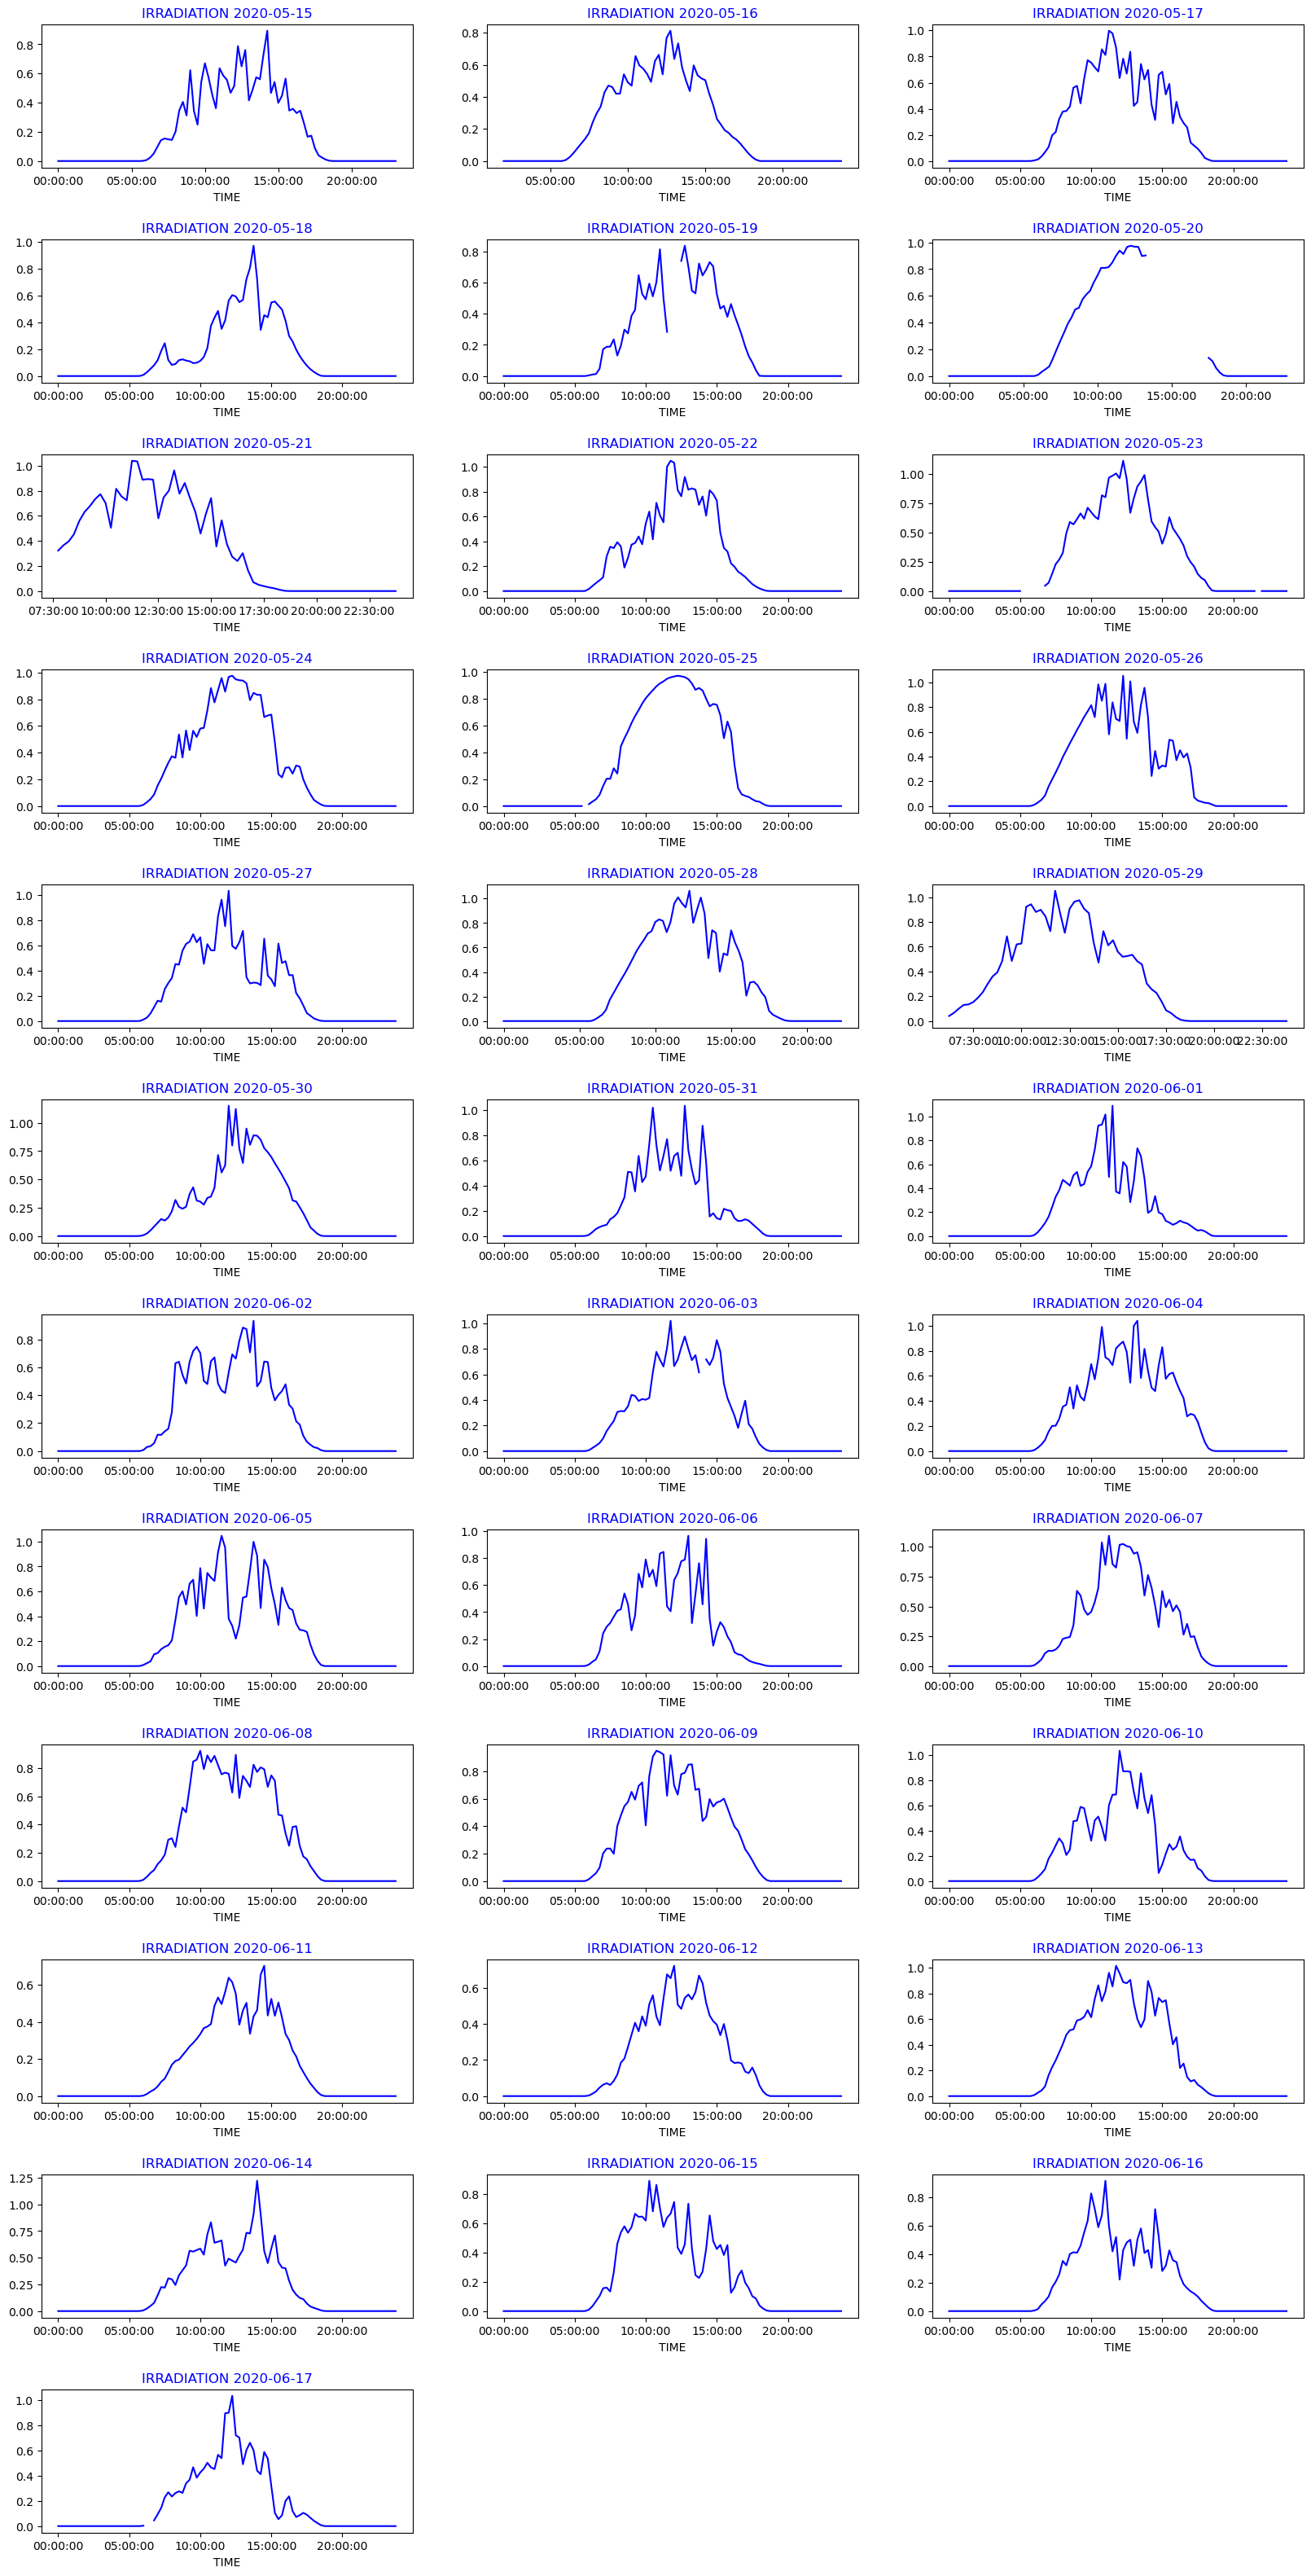

In [16]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40)) 
    
    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')
        
Daywise_plot(data=solar_irradiation, row=12, col=3)
plt.show()

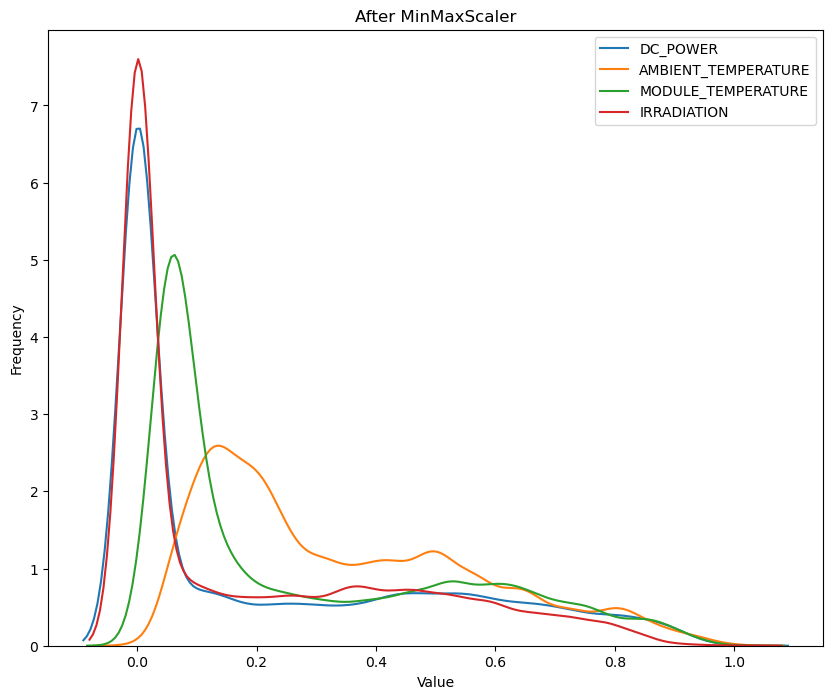

In [17]:
#DC_POWER	AMBIENT_TEMPERATURE	MODULE_TEMPERATURE	IRRADIATION

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()


df_solar[['DC_POWER',
    'AMBIENT_TEMPERATURE',
    'MODULE_TEMPERATURE',
    'IRRADIATION'
    ]] = scaler.fit_transform(df_solar[['DC_POWER',
                                        'AMBIENT_TEMPERATURE',
                                        'MODULE_TEMPERATURE',
                                        'IRRADIATION'
                                        ]])

fig, (ax1) = plt.subplots(ncols=1,figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(df_solar['DC_POWER'], ax=ax1, label='DC_POWER')
sns.kdeplot(df_solar['AMBIENT_TEMPERATURE'], ax=ax1, label='AMBIENT_TEMPERATURE')
sns.kdeplot(df_solar['MODULE_TEMPERATURE'], ax=ax1, label='MODULE_TEMPERATURE')
sns.kdeplot(df_solar['IRRADIATION'], ax=ax1, label='IRRADIATION')

ax1.legend()
ax1.set_xlabel ('Value')
ax1.set_ylabel ('Frequency')

plt.show()

Prediction

In [18]:
#Import Library
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error

In [19]:
df2 = df_solar.copy()
X = df2[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]
y = df2['DC_POWER']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

In [21]:
rmsle_val = []
best_rmsle = 1.0

for k in range(100):
    k = k+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = k)

    knn.fit(X_train, y_train) 
    y_pred = knn.predict(X_test)
    rmsle = np.sqrt(mean_squared_log_error(y_test,y_pred))
    if (rmsle < best_rmsle):
        best_rmsle = rmsle
        best_k = k
    rmsle_val.append(rmsle)
    print('RMSLE value for k= ' , k , 'is:', rmsle)

print(f"Best RMSLE: {best_rmsle}, Best k: {best_k}")

RMSLE value for k=  1 is: 0.030655609696673945
RMSLE value for k=  2 is: 0.02621258063466878
RMSLE value for k=  3 is: 0.02470574260203156
RMSLE value for k=  4 is: 0.024226261166598213
RMSLE value for k=  5 is: 0.023603716283274533
RMSLE value for k=  6 is: 0.023297822123437728
RMSLE value for k=  7 is: 0.02302735943746726
RMSLE value for k=  8 is: 0.023054868786576147
RMSLE value for k=  9 is: 0.02298224637365921
RMSLE value for k=  10 is: 0.022868935723596825
RMSLE value for k=  11 is: 0.022730665862916024
RMSLE value for k=  12 is: 0.02265802319446575
RMSLE value for k=  13 is: 0.02262999888346892
RMSLE value for k=  14 is: 0.022649753589532015
RMSLE value for k=  15 is: 0.02263976588212219
RMSLE value for k=  16 is: 0.022641952505697883
RMSLE value for k=  17 is: 0.022706466768538696
RMSLE value for k=  18 is: 0.022815684590307854
RMSLE value for k=  19 is: 0.022930109848509024
RMSLE value for k=  20 is: 0.023054018958158857
RMSLE value for k=  21 is: 0.023190000567547334
RMSLE va

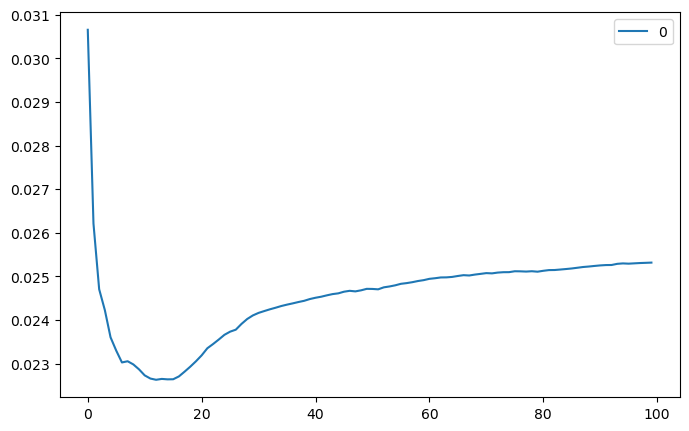

In [22]:
curve = pd.DataFrame(rmsle_val)
curve.plot(figsize=(8,5))

plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors

params = {'n_neighbors': list(range(3, 51, 2))}  # 3,5,7,...,49
knn = neighbors.KNeighborsRegressor()

# GridSearchCV untuk mencari parameter terbaik
model = GridSearchCV(knn, params)
model.fit(X_train,y_train)

# Lihat parameter terbaik
print("Best Params:", model.best_params_)


Best Params: {'n_neighbors': 11}


In [71]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 11)

knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
knn.score(X_test, y_test)

0.9852098758115005

In [72]:
data_prediction_knn = list(zip(y_test,y_pred_knn))
data_prediction_knn = pd.DataFrame(data_prediction_knn, columns=['Test','Prediction-KNN'])

In [73]:
dfs = data_prediction_knn.set_index('Test')
dfs.head(15)

,Prediction-KNN
Test,
0.000,0.000
0.758,0.728
0.211,0.213
0.000,0.000
0.000,0.000
0.859,0.844
0.000,0.000
0.003,0.002
0.563,0.572


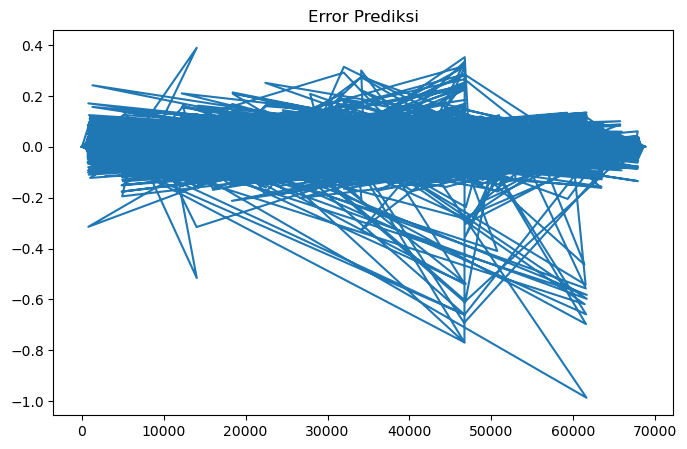

In [55]:
error = y_test - y_pred
plt.figure(figsize=(8,5))
plt.plot(error)
plt.title("Error Prediksi")
plt.show()


In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Prediksi data uji
y_pred = knn.predict(X_test)

# Hitung metrik evaluasi untuk regresi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE : {mse}")
print(f"RMSE: {rmse}")
print(f"MAE : {mae}")
print(f"R²  : {r2}")



MSE : 0.0011444305798581043
RMSE: 0.03382943363194401
MAE : 0.011736217196561078
R²  : 0.9852098758115005


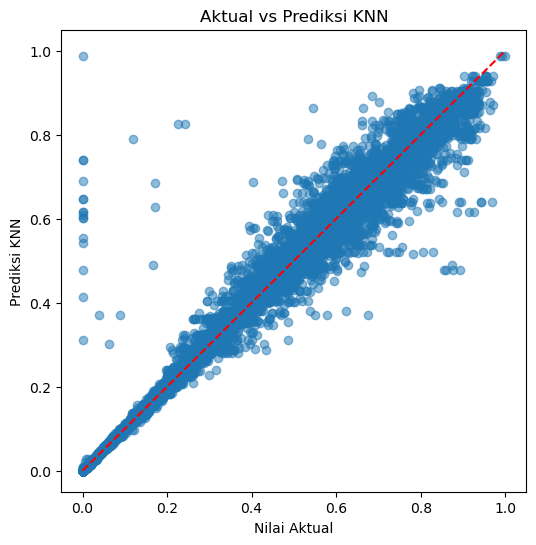

In [57]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi KNN")
plt.title("Aktual vs Prediksi KNN")
plt.plot([0,1],[0,1], 'r--')  # garis ideal prediksi sempurna
plt.show()


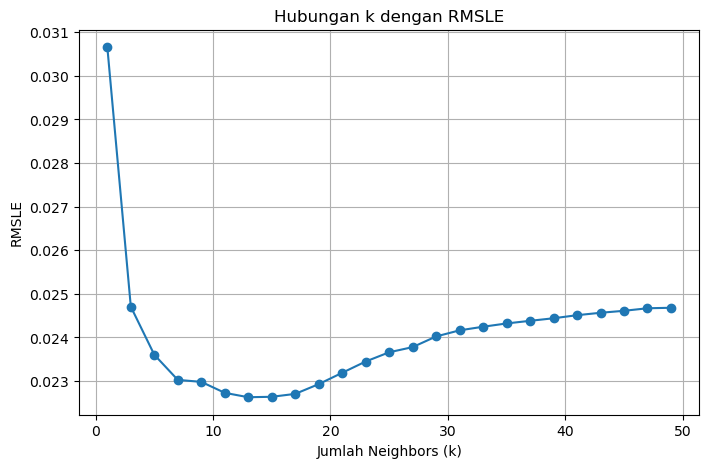

Best k: 13, RMSLE: 0.02262999888346892


In [58]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_log_error
from sklearn import neighbors

# Range k yang mau diuji (misal 1-50, step 2 biar gak terlalu banyak)
k_values = list(range(1, 51, 2))
rmsle_val = []

for k in k_values:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    # Hitung RMSLE
    rmsle = np.sqrt(mean_squared_log_error(y_test, y_pred))
    rmsle_val.append(rmsle)

# Plot k vs RMSLE
plt.figure(figsize=(8,5))
plt.plot(k_values, rmsle_val, marker='o')
plt.title("Hubungan k dengan RMSLE")
plt.xlabel("Jumlah Neighbors (k)")
plt.ylabel("RMSLE")
plt.grid(True)
plt.show()

# Cari k terbaik (RMSLE terkecil)
best_k = k_values[np.argmin(rmsle_val)]
best_rmsle = min(rmsle_val)
print(f"Best k: {best_k}, RMSLE: {best_rmsle}")


In [75]:
import pandas as pd

# Data baru
data_baru = pd.DataFrame([[20.5, 45.3, 800]],
                         columns=['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION'])

# Prediksi
y_pred_baru = model.predict(data_baru)
print("Hasil Prediksi:", y_pred_baru)



Hasil Prediksi: [0.98706358]
